LendingClubCaseStudy

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

Reading the Dataset

In [2]:
df=pd.read_csv('loan.csv',low_memory=False)
df.shape

(39717, 111)

Cleaning the dataset

In [3]:
#Checking the percentage of Nan values in dataset
percentage_null=round(df.isnull().sum() * 100 / len(df),2)
percentage_null

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [4]:
#Dropping the Columns having greater or equal to 75% Nan values
df=df.drop(percentage_null[percentage_null>=75.0].index,axis=1)
df.shape

(39717, 55)

In [5]:
# Finding the columns having unique data
# Sorted unique values based on the columns
# Dropping the unnecessary columns as per the column's data uniqueness
# dropped columns [tax_liens, delinq_amnt, chargeoff_within_12_mths, acc_now_delinq, application_type, policy_code, collections_12_mths_ex_med, initial_list_status pymnt_plan]

columns_with_unique_values=df.nunique().sort_values()
df_unique_values = columns_with_unique_values.to_frame().reset_index()
df_unique_values.rename(columns = {'index':'names',0:'uniquecount'},inplace = True)
df_unique_values=df_unique_values[df_unique_values.uniquecount==1]
df_unique_values
df=df.drop(columns=df_unique_values['names'][0:len(df_unique_values)],axis=1)
df.shape

(39717, 46)

In [6]:
#Dropping the columns which are not required for the data analysis (Customer behaviour)
df=df.drop(columns=['delinq_2yrs','id','member_id','desc','title','zip_code','mths_since_last_delinq','pub_rec_bankruptcies','emp_title','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','url'],axis=1)
df.shape



(39717, 19)

In [7]:
#Dropping the rows home_ownership is having NONE values
df=df[df.home_ownership!='NONE']

#Dropping the rows loan_status is having Current Value
df=df[df.loan_status!="Current"]


In [8]:
#Removing the % from int_rate column
df.int_rate=df.int_rate.str.strip("%").astype(float)
#Removing the % from revol_util column 
#revol_util column is customer behaviour column can be removed if not required
df.revol_util=df.revol_util.str.strip("%").astype(float)
#Converting the term column to integers ( eg: 36 months as 36)
df.term=df.term.str.strip("months").astype(int)
#Formatting issue_d
df.issue_d=pd.to_datetime(df.issue_d,format='%b-%y')
#converting installment column to int
df.installment=df.installment.astype(int)


In [9]:
#Approved ratio of loan amount (funded_amnt_inv/loan_amnt)*100

df['loan_amnt_approved_ratio']=round((df.funded_amnt_inv*100)/(df.loan_amnt),2)


In [10]:
#emp_length column modification to number of years ( eg: 6 years as 6)

#Filling the empty cells of emp_length with 0

df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)

df.emp_length.isna().sum()

df.emp_length=pd.to_numeric(df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [11]:
#annual_inc
df.annual_inc[14]

100000.0

In [12]:
#Converting final data after cleaning to csv file

df.to_csv('loan_data.csv', index = False, encoding='utf-8') # False: not include index
print(df)

       loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0           5000         5000           4975.0    36     10.65          162   
1           2500         2500           2500.0    60     15.27           59   
2           2400         2400           2400.0    36     15.96           84   
3          10000        10000          10000.0    36     13.49          339   
5           5000         5000           5000.0    36      7.90          156   
...          ...          ...              ...   ...       ...          ...   
39712       2500         2500           1075.0    36      8.07           78   
39713       8500         8500            875.0    36     10.28          275   
39714       5000         5000           1325.0    36      8.07          156   
39715       5000         5000            650.0    36      7.43          155   
39716       7500         7500            800.0    36     13.75          255   

      grade sub_grade  emp_length home_ownership  a

Uni Variate Analysis

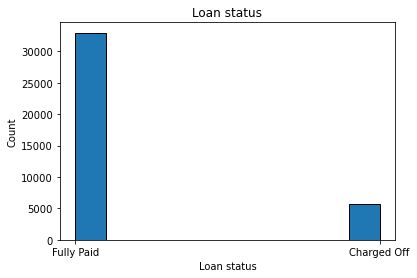

In [35]:
#Histogram

plt.hist(df.loan_status,ec='black')
plt.xlabel('Loan status')
plt.ylabel("Count")
plt.title("Loan status")
plt.show()


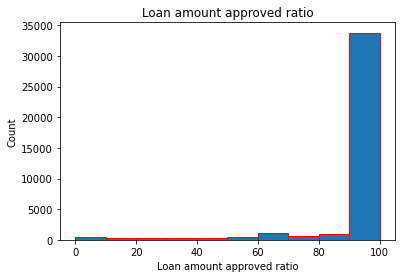

In [37]:
plt.hist(df.loan_amnt_approved_ratio,bins=10,ec='red')
plt.xlabel('Loan amount approved ratio')
plt.ylabel("Count")
plt.title("Loan amount approved ratio")
plt.show()


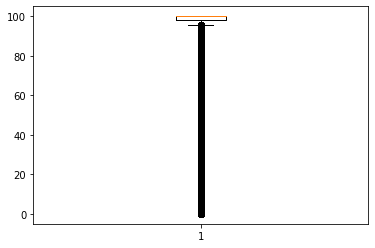

In [39]:
plt.boxplot(df.loan_amnt_approved_ratio)
plt.show()

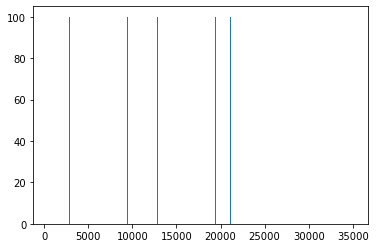

In [44]:
plt.bar(df.loan_amnt,df.loan_amnt_approved_ratio)
plt.show()